In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

![](pic5.png)

Пусть $ y_{1} = x, \: y_{2} = y, \: y_{3} = x^{'}_{t}, \: y_{4} = y^{'}_{t}  $

$$
\frac{dy_{1}}{dt} = y_3, \:  \frac{dy_2}{dt} = y_{4}, \\
\frac{dy_{3}}{dt} =  2y_4 + y_1 - \frac{\overline{\mu}(y_1+\mu)}{r_1^{3}} - \frac{\mu(y_1-\overline{\mu})}{r_2^{3}} - f y_3,  \\
\frac{dy_4}{dt} =  -2y_3 + y_2 - \frac{\overline{\mu}y_2}{r_1^{3}} - \frac{\mu y_2}{r_2^{3}} - f y_4
$$

$$
y_1(0) = 1.2, \: y_2(0) = -1.05, \: y_3(0) = 0, \: y_4(0) = v
$$

In [2]:
# координаты спутника
x_c = 1.2
y_c = -1.05
# координаты земли
mu = 1 / 82.45
x_z = 1 - mu
y_z = 0

R = np.sqrt((x_c-x_z)**2 + (y_c-y_z)**2)  # радиус орбиты спутника
T = 6.2  # период
v = (2 * np.pi * R) / T  # скорость
# получили недостающее нач условие
v

1.0855860333323184

In [3]:
def f(t, y: list, F):
    y1, y2, y3, y4 = y 
    
    mu = 1 / 82.45
    mu_ = 1 - mu
    r13 = ((y1 + mu)**2 + y2**2)**(3/2)
    r23 = ((y1 - mu_)**2 + y2**2)**(3/2)
    
    f1 = y3
    f2 = y4
    f3 = 2*y4 + y1 - (mu_*(y1+mu))/r13 - (mu*(y1-mu_))/r23 - F*y3
    f4 = -2*y3 + y2 - (mu_*y2)/r13 - (mu*y2)/r23 - F*y4
    
    f = np.array([f1, f2, f3, f4])
    return f

**Метод Дормана Принса 5(4)**

In [4]:
a = np.array([[0, 0, 0, 0, 0, 0, 0],
              [1/5, 0, 0, 0, 0, 0, 0],
              [3/40, 9/40, 0, 0, 0, 0, 0],
              [44/45, -56/15, 32/9, 0, 0, 0, 0],
              [19372/6561, -25360/2187, 64448/6561, -212/729, 0, 0, 0],
              [9017/3168, -355/33, 46732/5247, 49/176, -5103/18656, 0, 0],
              [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]])

c = np.array([0, 3, 3/10, 4/5, 8/9, 1, 1])

b = np.array([35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0])
b_ = np.array([5179/57600, 0, 7571/16695, 393/640, -92097/339200, 187/2100, 1/40])

In [6]:
def dorm_prince(F=0):
    """Метод Дормана-Принса"""
    t_n = 8
    h0 = 0.1

    H = [h0]  # список шагов
    t = [0]

    y = [np.array([1.2, -1.05, 0, v])]  # решения основного метода
    z = [np.array([1.2, -1.05, 0, v])]  # решения вспомогательного метода

    eps = 1e-5
    hmin = 1e-3
    hmax = 1

    i = 0
    while t[-1] <= t_n:
        h = H[-1]

        k1 = f(t[i], y[i], F)
        k2 = f(t[i]+h*c[1], y[i]+h*a[1,0]*k1, F)
        k3 = f(t[i]+h*c[2], y[i]+h*(a[2,0]*k1+a[2,1]*k2), F)
        k4 = f(t[i]+h*c[3], y[i]+h*(a[3,0]*k1+a[3,1]*k2+a[3,2]*k3), F)
        k5 = f(t[i]+h*c[4], y[i]+h*(a[4,0]*k1+a[4,1]*k2+a[4,2]*k3+a[4,3]*k4), F)
        k6 = f(t[i]+h*c[5], y[i]+h*(a[5,0]*k1+a[5,1]*k2+a[5,2]*k3+a[5,3]*k4+a[5,4]*k5), F)
        k7 = f(t[i]+h*c[6], y[i]+h*(a[6,0]*k1+a[6,1]*k2+a[6,2]*k3+a[6,3]*k4+a[6,4]*k5+a[6,5]*k6), F)

        y.append([])
        z.append([])
        y[i+1] = y[i] + h*(b[0]*k1 + b[1]*k2 + b[2]*k3 + b[3]*k4 + b[4]*k5 + b[5]*k6 + b[6]*k7)
        z[i+1] = z[i] + h*(b_[0]*k1 + b_[1]*k2 + b_[2]*k3 + b_[3]*k4 + b_[4]*k5 + b_[5]*k6 + b_[6]*k7)

        # контроль шага
        error = max(abs(y[i+1] - z[i+1]))

        h_new = 0.9 * h * (eps/error)**(0.2)

        if h_new < hmin:
            h_new = hmin
        elif h_new > hmax:
            h_new = hmax

        H.append(h_new)
        t.append(t[-1] + h_new)
        i += 1
    
    y = np.array(y)
    return y[:, 0], y[:, 1]

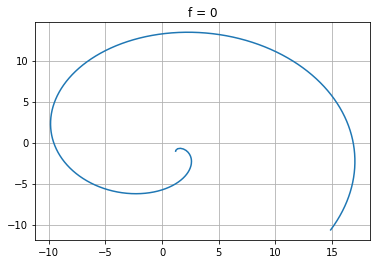

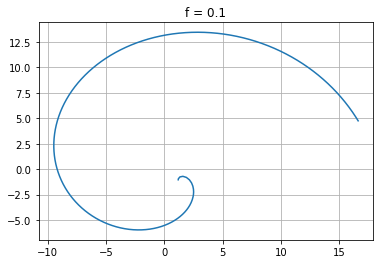

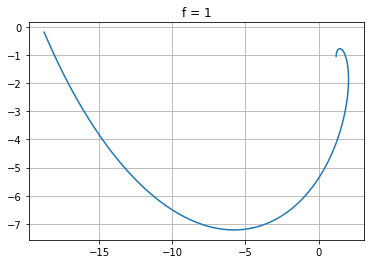

In [7]:
F_list = [0, 1/10, 1]

for F in F_list: 
    x, y = dorm_prince(F)
    plt.plot(x, y)
    plt.title(f'f = {F}')
    plt.grid()
    plt.show()

**Классический метод Рунге-Кутты**

In [8]:
def rk(F=0):
    t_n = 8
    h = 0.01
    N = int(t_n / h) + 2

    t = np.linspace(0, t_n, N+1)
    y = np.zeros((N+1, 4))

    # начальные условия
    y[0][0] = 1.2
    y[0][1] = -1.05
    y[0][2] = 0
    y[0][3] = v

    for i in range(N):
        k1 = f(t[i], y[i], F)
        k2 = f(t[i]+h/2, y[i]+(h/2)*k1, F)
        k3 = f(t[i]+h/2, y[i]+(h/2)*k2, F)
        k4 = f(t[i]+h, y[i]+h*k3, F)

        y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    return y[:, 0], y[:, 1]

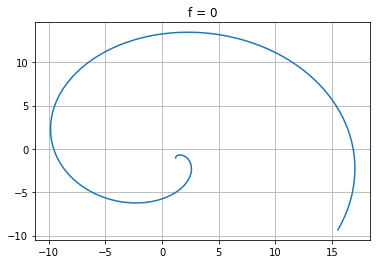

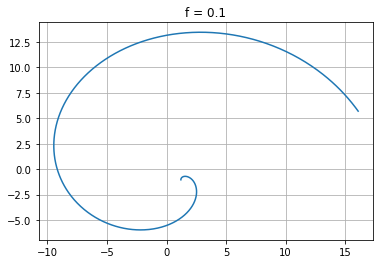

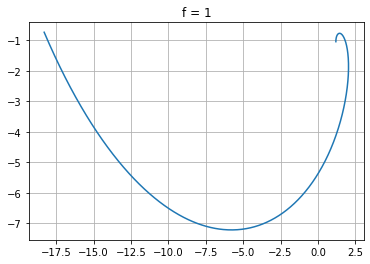

In [9]:
F_list = [0, 1/10, 1]

for F in F_list: 
    x, y = rk(F)
    plt.plot(x, y)
    plt.title(f'f = {F}')
    plt.grid()
    plt.show()